In [56]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt

In [47]:
X_train = pd.read_csv('C:\\Users\\Krishna\\IIT MADRAS\\PRML\\Assignment 2\\A2Data_train.csv',header = None)
X_test = pd.read_csv('C:\\Users\\Krishna\\IIT MADRAS\\PRML\\Assignment 2\\A2Data_test.csv',header = None)

y_train = np.array(X_train.iloc[:,-1]).reshape(10000,1)
X_train = np.array(X_train.iloc[:,:-1].T)
y_test = np.array(X_test.iloc[:,-1]).reshape(500,1)
X_test = np.array(X_test.iloc[:,:-1].T)

## i

In [90]:
def del_f(X, y, w):
    return 2*((X@X.T@w) - (X@y))

def grad_desc(X, y, w_ini, e=1e-5, lr=2e-6, max_iter=1e5):
    
    grad = del_f(X,y,w_ini)
    w_fin = w_ini
    iter_ = 0
    
    while np.linalg.norm(grad) >= e and iter_ <= max_iter:
        w = w_fin
        w_fin = w - lr*grad
        grad = del_f(X,y,w_fin)
        iter_ += 1
    
    return w_fin

In [92]:
def del_f_ridge(X, y, w, lam):
    return 2*((X@X.T@w) - (X@y) + lam*w)

def grad_desc_ridge(X, y, w_ini, lam, e=1e-5, lr=2e-6, max_iter=1e5):
    
    grad = del_f_ridge(X,y,w_ini,lam)
    w_fin = w_ini
    iter_ = 0
    
    while np.linalg.norm(grad) >= e and iter_ <= max_iter:
        w = w_fin
        w_fin = w - lr*grad
        grad = del_f_ridge(X,y,w_fin,lam)
        iter_ += 1
    
    return w_fin

def err_ridge(X, y, w_fin, lam):
    return np.linalg.norm(X.T@w_fin - y)**2 + lam*np.linalg.norm(w_fin)**2

def loss(X, y, w):
    return np.linalg.norm(X.T@w - y)**2

## ii

In [81]:
def kfold_split(X, y, k, num):
    cols = X.shape[1]
    idx_test = list(range((num-1)*cols//k, num*cols//k))
    idx_train = list(set(range(0,cols))-set(idx_test))
    test_X = X[:,idx_test]
    test_y = y[idx_test]
    train_X = X[:,idx_train]
    train_y = y[idx_train]
    return train_X, train_y, test_X, test_y
    
def kfold_ridge(X, y, w, lam_list, k=5):
    cv_err = []
    for lam in lam_list:
        cv_loss = 0
        for fold in range(1,k+1):
            train_X, train_y, test_X, test_y = kfold_split(X, y, k ,fold)
            w_fin = grad_desc_ridge(train_X, train_y, w, lam)
            cv_loss += loss(test_X, test_y, w_fin)
        cv_err.append(cv_loss)
    return cv_err

In [97]:
lam_list = np.arange(1,2.5,0.1)
w_ini = np.ones((100,1))
cv_error = kfold_ridge(X_train, y_train, w_ini, lam_list)

Optimal lambda = 2.000000000000001


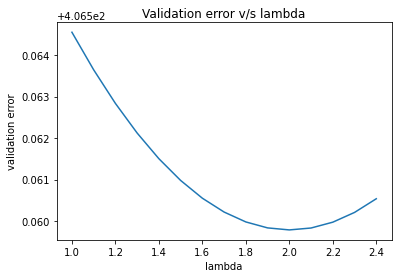

In [98]:
final_lam = lam_list[cv_error.index(min(cv_error))]
plt.plot(lam_list,cv_error)
print('Optimal lambda =',final_lam)
plt.xlabel('lambda')
plt.ylabel('validation error')
plt.title('Validation error v/s lambda')
plt.show()

In [99]:
w_r = grad_desc_ridge(X_train, y_train, w_ini, final_lam)
w_ml = grad_desc(X_train, y_train, w_ini)

In [100]:
print(loss(X_test, y_test, w_r)/X_test.shape[1])
print(loss(X_test, y_test, w_ml)/X_test.shape[1])

0.3698822679778238
0.37072731043925455
